## Part 1: Preprocessing

In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras import layers

#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')

display(attrition_df.head())
display(attrition_df.info())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   HourlyRate                1470 non-null   int64 
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  NumCompaniesWorked      

None

In [ ]:
# Determine the number of unique values in each column.
display(attrition_df.nunique().sort_values())
attrition_df.columns

,0
Attrition,2
PerformanceRating,2
OverTime,2
MaritalStatus,3
BusinessTravel,3
Department,3
JobSatisfaction,4
RelationshipSatisfaction,4
JobInvolvement,4
EnvironmentSatisfaction,4


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Create y_df with the Attrition and Department columns

#  Attrition:  Yes, No **(encode to 1, 0)
#  Department: 3 Research & Development, Sales and ...

y_df = attrition_df[['Attrition', 'Department']]
display(y_df.head())

,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [ ]:
# inspect the values of the y columns:

for col in y_df.columns:
    unique_values = sorted(y_df[col].unique().tolist())
    val_type = type(unique_values[0])
    print(f'{col} ({len(unique_values)}) {type(unique_values[0])}: {unique_values}')

Attrition (2) <class 'str'>: ['No', 'Yes']
Department (3) <class 'str'>: ['Human Resources', 'Research & Development', 'Sales']


In [ ]:
# encode the y_df values:

attr_encoded = y_df['Attrition'].apply(lambda x: 0 if x=='No' else 1)
dept_encoded = y_df['Department'].apply(lambda x: 0 if x=='Research & Development'
                                          else 1 if x=='Sales'
                                          else 2)

y_df_encoded = pd.DataFrame({"Attrition": attr_encoded,
                             "Department": dept_encoded})

display(y_df_encoded.head())
display(y_df_encoded['Department'].value_counts())
display(y_df_encoded['Attrition'].value_counts())

,Attrition,Department
0,1,1
1,0,0
2,1,0
3,0,0
4,0,0


,count
Department,
0,961
1,446
2,63


,count
Attrition,
0,1233
1,237


In [ ]:
# look at all X feature columns
X_df = attrition_df.drop(columns = ['Attrition', 'Department'])
display(X_df.head())

,Age,BusinessTravel,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1,2,Life Sciences,2,94,3,2,Sales Executive,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,8,1,Life Sciences,3,61,2,2,Research Scientist,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,2,2,Other,4,92,2,1,Laboratory Technician,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,3,4,Life Sciences,4,56,3,1,Research Scientist,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,2,1,Medical,1,40,3,1,Laboratory Technician,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
# inspect the values, their number, and type for each column (using a loop):

X_vals_str = []
unique_vals_dict_str = {}
X_vals_int = []
unique_vals_dict_int = {}
X_vals = []
unique_vals_dict = {}

for col in X_df.columns:
    unique_values = sorted(X_df[col].unique().tolist())
    val_type = type(unique_values[0])

    if val_type == str:
        X_vals_str.append(col)
        unique_vals_dict_str.update({col : unique_values})
    elif val_type == int:
        X_vals_int.append(col)
        unique_vals_dict_int.update({col : unique_values})
    else:
        X_vals.append(col)
        unique_vals_dict.update({col : unique_values})

print ("\nStrings: ------------------------\n")
print(X_vals_str, "\n")
for key, value in unique_vals_dict_str.items():
    print(f"{key} ({len(value)}) : {value}")

print ("\nInts: ------------------------\n")
print(X_vals_int, "\n")
for key, value in unique_vals_dict_int.items():
    print(f"{key} ({len(value)}) : {value}")

print ("\nOther: ------------------------\n")
print(X_vals, "\n")
for key, value in unique_vals_dict.items():
    print(f"{key} ({len(value)}) : {value}")


Strings: ------------------------

['BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime'] 

BusinessTravel (3) : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
EducationField (6) : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
JobRole (9) : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus (3) : ['Divorced', 'Married', 'Single']
OverTime (2) : ['No', 'Yes']

Ints: ------------------------

['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'

In [ ]:
# Scale the X int/numerical data X_vals_int, as diff scales of Age, Hourly Rate might impact outcomes.

X_vals_int_df = X_df[X_vals_int]
X_vals_int_df.astype('float')
display(X_vals_int_df.head())
# X_vals_int_df.info()

X_int_feat_scaler = StandardScaler().fit_transform(X_vals_int_df)
# display(scaler[:10])
X_int_feat_scale_df = pd.DataFrame(X_int_feat_scaler, columns=X_vals_int_df.columns)
display(X_int_feat_scale_df.head())

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,2,94,3,2,4,8,11,3,1,0,8,0,1,6,4,0,5
1,49,8,1,3,61,2,2,2,1,23,4,4,1,10,3,3,10,7,1,7
2,37,2,2,4,92,2,1,3,6,15,3,2,0,7,3,3,0,0,0,0
3,33,3,4,4,56,3,1,3,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,1,1,40,3,1,2,9,12,3,4,1,6,3,3,2,2,2,2


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,1.324226,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.678049,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,2.525591,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


###Use Ordinal Encoding to help determine important X feature columns

In [ ]:
# check Ordinal Encoded data for Feature Importance

# Try Ordinal Encoding on string Feature columns
# Use to encode data to run RandomForestClassifier and check feature importance

# BusinessTravel (3) : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
# EducationField (6) : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
# JobRole (9) : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
# MaritalStatus (3) : ['Divorced', 'Married', 'Single']
# OverTime (2) : ['No', 'Yes']

X_ord_str_encode_df = X_df[X_vals_str]
display(X_ord_str_encode_df.head())

for col in X_vals_str:
    X_ord_str_encode_df[col] = X_ord_str_encode_df[col].astype('category').cat.codes

display(X_ord_str_encode_df.head())


,BusinessTravel,EducationField,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Life Sciences,Sales Executive,Single,Yes
1,Travel_Frequently,Life Sciences,Research Scientist,Married,No
2,Travel_Rarely,Other,Laboratory Technician,Single,Yes
3,Travel_Frequently,Life Sciences,Research Scientist,Married,Yes
4,Travel_Rarely,Medical,Laboratory Technician,Married,No


<ipython-input-12-db7efec5a39b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ord_str_encode_df[col] = X_ord_str_encode_df[col].astype('category').cat.codes
<ipython-input-12-db7efec5a39b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ord_str_encode_df[col] = X_ord_str_encode_df[col].astype('category').cat.codes
<ipython-input-12-db7efec5a39b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,BusinessTravel,EducationField,JobRole,MaritalStatus,OverTime
0,2,1,7,2,1
1,1,1,6,1,0
2,2,4,2,2,1
3,1,1,6,1,1
4,2,3,2,1,0


In [ ]:
# check Ordinal Encoded data for Feature Importance
# Recombine X_ord encoded string data with X_ scaled numerical data

X_ord_recombine_df = pd.concat([X_int_feat_scale_df, X_ord_str_encode_df], axis=1)
display(X_ord_recombine_df.head())

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,EducationField,JobRole,MaritalStatus,OverTime
0,0.446350,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,2.125136,-1.150554,...,-2.493820,-0.164613,-0.063296,-0.679146,0.245834,2,1,7,2,1
1,1.322365,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.678049,2.129306,...,0.338096,0.488508,0.764998,-0.368715,0.806541,1,1,6,1,0
2,0.008343,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,1.324226,-0.057267,...,0.338096,-1.144294,-1.167687,-0.679146,-1.155935,2,4,2,2,1
3,-0.429664,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.678049,-1.150554,...,0.338096,0.161947,0.764998,0.252146,-1.155935,1,1,6,1,1
4,-1.086676,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,2.525591,-0.877232,...,0.338096,-0.817734,-0.615492,-0.058285,-0.595227,2,3,2,1,0


In [ ]:
# check Ordinal Encoded data for Feature Importance
# check Ordinal Encoded (X_ord_recombine_df))for Feature Importance w/RandomForestClassifier
# use y_df_encoded

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_ord_recombine_df, y_df_encoded)
importances = np.round(model.feature_importances_ * 100, 3)  # get in %
feature_names = X_ord_recombine_df.columns

# Create a DataFrame for feature importances
X_ord_feat_import_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
X_ord_feat_import_df.sort_values(by='Importance', ascending=False, inplace=True)
X_ord_feat_import_df.reset_index(inplace=True, drop=True)

display("X ord feature importances %:", (X_ord_feat_import_df))


'X ord feature importances %:'

,Feature,Importance
0,JobRole,42.377
1,EducationField,5.603
2,Age,4.267
3,JobLevel,4.212
4,TotalWorkingYears,3.892
5,HourlyRate,3.531
6,DistanceFromHome,3.302
7,YearsAtCompany,2.871
8,PercentSalaryHike,2.698
9,NumCompaniesWorked,2.487


,Feature,Importance
9,NumCompaniesWorked,2.487
8,PercentSalaryHike,2.698
7,YearsAtCompany,2.871
6,DistanceFromHome,3.302
5,HourlyRate,3.531
4,TotalWorkingYears,3.892
3,JobLevel,4.212
2,Age,4.267
1,EducationField,5.603
0,JobRole,42.377


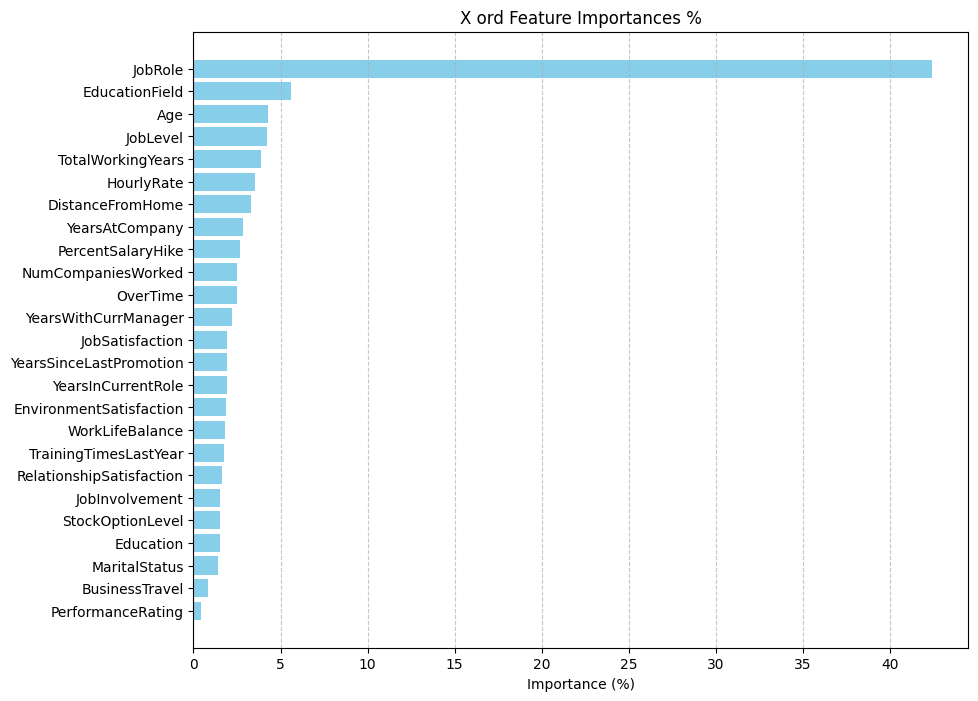

In [ ]:
# check Ordinal Encoded data for Feature Importance
# Visualize with Matlibplot plt bar chart of feature importance:
X_ord_feat_import_df = X_ord_feat_import_df.sort_values(by='Importance', ascending=True)
top_features = X_ord_feat_import_df.tail(10)
display(top_features)

plt.figure(figsize=(10, 8))
plt.barh(X_ord_feat_import_df['Feature'], X_ord_feat_import_df['Importance'], color='skyblue')
plt.xlabel('Importance (%)')
plt.title('X ord Feature Importances %')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

Text(0.5, 1.0, 'X ord Feature Importance %')

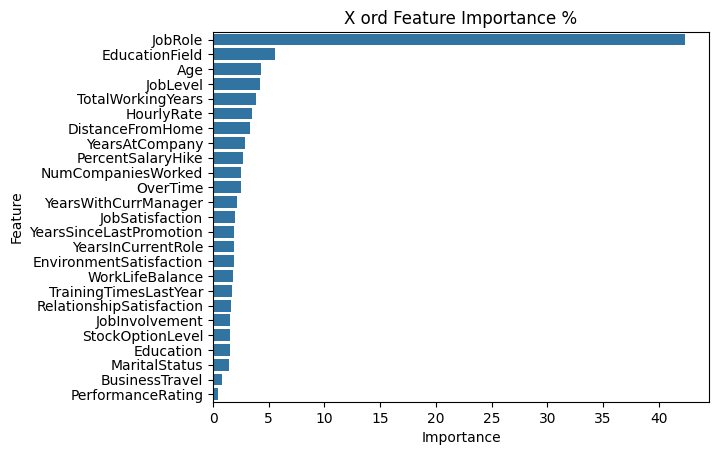

In [ ]:
# check Ordinal Encoded data for Feature Importance
# Visualize with Seaborn bar chart of feature importance
import seaborn as sns
X_ord_feat_import_df = X_ord_feat_import_df.sort_values(by='Importance', ascending=False)

bar_plot = sns.barplot(data=X_ord_feat_import_df, x='Importance', y='Feature')
bar_plot.set_title("X ord Feature Importance %")
# Rotate the x-axis labels
# plt.xticks(rotation=45, horizontalalignment='right')

In [ ]:
# check Ordinal Encoded data for Feature Importance

# Drop anything below 1.7% importance
# Get a list of the Orinal encoded most valuable features:
threshold = 1.7
X_ord_top_feat = X_ord_feat_import_df[X_ord_feat_import_df['Importance'] >= threshold]
X_ord_top_feat_list = X_ord_top_feat['Feature'].tolist()
display(X_ord_top_feat_list)

['JobRole',
 'EducationField',
 'Age',
 'JobLevel',
 'TotalWorkingYears',
 'HourlyRate',
 'DistanceFromHome',
 'YearsAtCompany',
 'PercentSalaryHike',
 'NumCompaniesWorked',
 'OverTime',
 'YearsWithCurrManager',
 'JobSatisfaction',
 'YearsSinceLastPromotion',
 'YearsInCurrentRole',
 'EnvironmentSatisfaction',
 'WorkLifeBalance',
 'TrainingTimesLastYear']

### Select most important features for X_ord_df based on Ordinal Encoding value determination
output:
X_ord_df
y_df_encoded

In [ ]:
# Take top Features from the Ordinal Encoding value determination and place in X_ord_df
#  will be using with y_df_encoded

# Create the X_ord df using the X_ord_encode_df encoded df w/ only using important X_ord_features:

X_ord_df = X_ord_recombine_df[X_ord_top_feat_list]
display(X_ord_df.head())

,JobRole,EducationField,Age,JobLevel,TotalWorkingYears,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,OverTime,YearsWithCurrManager,JobSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,EnvironmentSatisfaction,WorkLifeBalance,TrainingTimesLastYear
0,7,1,0.446350,-0.057788,-0.421642,1.383138,-1.010909,-0.164613,-1.150554,2.125136,1,0.245834,1.153254,-0.679146,-0.063296,-0.660531,-2.493820,-2.171982
1,6,1,1.322365,-0.057788,-0.164511,-0.240677,-0.147150,0.488508,2.129306,-0.678049,0,0.806541,-0.660853,-0.368715,0.764998,0.254625,0.338096,0.155707
2,2,4,0.008343,-0.961486,-0.550208,1.284725,-0.887515,-1.144294,-0.057267,1.324226,1,-1.155935,0.246200,-0.679146,-1.167687,1.169781,0.338096,0.155707
3,6,1,-0.429664,-0.961486,-0.421642,-0.486709,-0.764121,0.161947,-1.150554,-0.678049,1,-1.155935,0.246200,0.252146,0.764998,1.169781,0.338096,0.155707
4,2,3,-1.086676,-0.961486,-0.678774,-1.274014,-0.887515,-0.817734,-0.877232,2.525591,0,-0.595227,-0.660853,-0.058285,-0.615492,-1.575686,0.338096,0.155707


### Now Repeat above steps using One-Hot Encoding to help determine important X feature columns


In [ ]:
# check One-Hot Encoded data for Feature Importance

# Use One Hot Encoding on string Feature data, then run a RandomForestClassifier and check feature importance

display(X_vals_str)
# BusinessTravel (3) : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
# EducationField (6) : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
# JobRole (9) : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
# MaritalStatus (3) : ['Divorced', 'Married', 'Single']
# OverTime (2) : ['No', 'Yes']

from sklearn.preprocessing import OneHotEncoder
X_ohe_str_feats_df = X_df[X_vals_str]
print("before one-hot-encoding: ")
display(X_ohe_str_feats_df.head())

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
ohe_str_encoded_data = encoder.fit_transform(X_ohe_str_feats_df)

# Convert the encoded data back to a DataFrame
X_ohe_str_feats_encoded_df = pd.DataFrame(ohe_str_encoded_data,
                                   columns=encoder.get_feature_names_out(X_ohe_str_feats_df.columns))

print("\nafter one-hot-encoding strings portion of DF: ")
display(X_ohe_str_feats_encoded_df.head())

['BusinessTravel', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

before one-hot-encoding: 


,BusinessTravel,EducationField,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Life Sciences,Sales Executive,Single,Yes
1,Travel_Frequently,Life Sciences,Research Scientist,Married,No
2,Travel_Rarely,Other,Laboratory Technician,Single,Yes
3,Travel_Frequently,Life Sciences,Research Scientist,Married,Yes
4,Travel_Rarely,Medical,Laboratory Technician,Married,No



after one-hot-encoding strings portion of DF: 


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# check One-Hot Encoded data for Feature Importance

# Recombine the One Hot encoded string Dataframe with X_ scaled numerical data

X_ohe_recombine_df = pd.concat([X_int_feat_scale_df, X_ohe_str_feats_encoded_df], axis=1)
display(X_ohe_recombine_df.head())

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,2.125136,-1.150554,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.322365,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.678049,2.129306,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.008343,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,1.324226,-0.057267,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.429664,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.678049,-1.150554,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.086676,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,2.525591,-0.877232,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
# check One-Hot Encoded data for Feature Importance

# check one-hot-encoded data "X_one_hot_encode_df" for Feature Importance w/ RandomForestClassifier
# use y_df_encoded

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier().fit(X_ohe_recombine_df, y_df_encoded)
ohe_importances = model.feature_importances_ * 100  # get in %
ohe_feat_names = X_ohe_recombine_df.columns

# Create a DataFrame for feature importances
ohe_feat_impt_df = pd.DataFrame({'ohe Feature': ohe_feat_names, 'ohe Importance': ohe_importances})
ohe_feat_impt_df.sort_values(by='ohe Importance', ascending=False, inplace=True)
ohe_feat_impt_df.reset_index(inplace=True, drop=True)
display("ohe feature_importances:", (ohe_feat_impt_df))

'ohe feature_importances:'

,ohe Feature,ohe Importance
0,JobRole_Sales Executive,22.347411
1,EducationField_Marketing,7.430181
2,JobRole_Sales Representative,6.399526
3,JobRole_Human Resources,4.894695
4,TotalWorkingYears,3.367596
5,Age,3.324320
6,JobRole_Research Scientist,3.168350
7,JobLevel,3.085200
8,JobRole_Laboratory Technician,3.052781
9,HourlyRate,2.802411


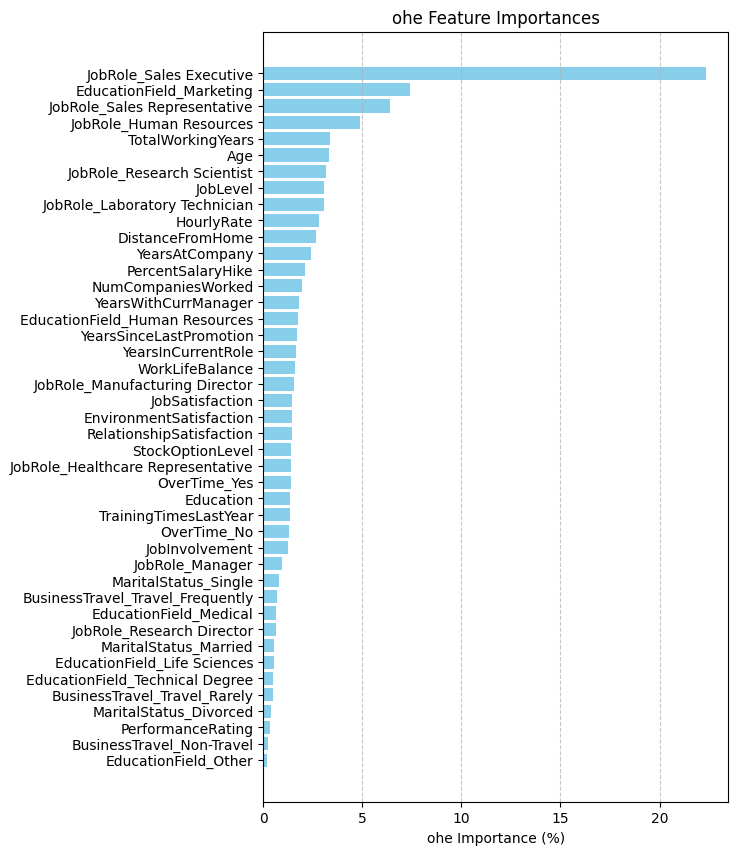

In [ ]:
# check One-Hot Encoded data for Feature Importance

# Sort by importance and visualize with  matplotlib.pyplot as plt
ohe_feat_impt_df = ohe_feat_impt_df.sort_values(by='ohe Importance', ascending=True)

plt.figure(figsize=(6, 10))
plt.barh(ohe_feat_impt_df['ohe Feature'], ohe_feat_impt_df['ohe Importance'], color='skyblue')
plt.xlabel('ohe Importance (%)')
plt.title('ohe Feature Importances')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

<ipython-input-30-e0ed28af90a3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='ohe Importance', y='ohe Feature', data=ohe_feat_impt_df, palette='viridis')


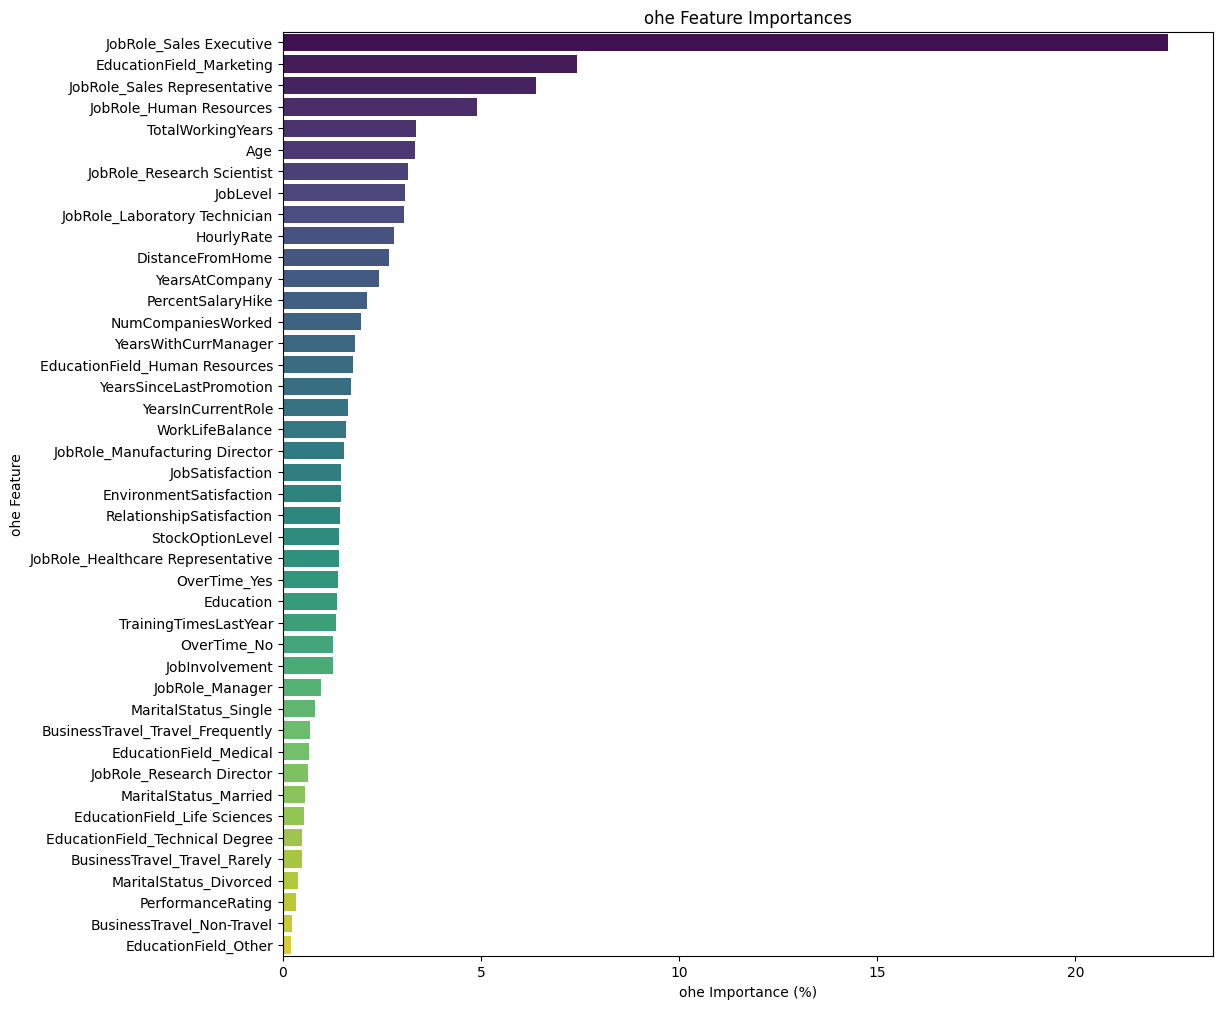

In [ ]:
# check One-Hot Encoded X string data for Feature Importance

# Visualize with Seaborn bar chart of feature importance:
import seaborn as sns
ohe_feat_impt_df = ohe_feat_impt_df.sort_values(by='ohe Importance', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 12))  # Width=12, Height=8

# Create the bar plot
bar_plot = sns.barplot(x='ohe Importance', y='ohe Feature', data=ohe_feat_impt_df, palette='viridis')

# Add labels and title
plt.xlabel('ohe Importance (%)')
plt.ylabel('ohe Feature')
plt.title('ohe Feature Importances')

# Display the plot
plt.show()

In [ ]:
# check One-Hot Encoded X string data for Feature Importance

# drop anything below 1.5% importance as destermined from Feat Importance determination

# Get a list of the most important One-Hot-Encoded most valuable features:
threshold = 1.5
X_ohe_impt = ohe_feat_impt_df[ohe_feat_impt_df['ohe Importance'] >= 1.5]
X_ohe_impt_feat_list = X_ohe_impt['ohe Feature'].tolist()
display(X_ohe_impt_feat_list)

['JobRole_Sales Executive',
 'EducationField_Marketing',
 'JobRole_Sales Representative',
 'JobRole_Human Resources',
 'TotalWorkingYears',
 'Age',
 'JobRole_Research Scientist',
 'JobLevel',
 'JobRole_Laboratory Technician',
 'HourlyRate',
 'DistanceFromHome',
 'YearsAtCompany',
 'PercentSalaryHike',
 'NumCompaniesWorked',
 'YearsWithCurrManager',
 'EducationField_Human Resources',
 'YearsSinceLastPromotion',
 'YearsInCurrentRole',
 'WorkLifeBalance',
 'JobRole_Manufacturing Director']

In [ ]:
# Leave the Ordinal Encoding value determination with the following variables:
# X_one_hot_recombined_df, X_ord_features y_df_encoded

# Create the X_ord df using the X_ord_encode_df encoded df w/ only using important X_ord_features:

X_ohe_df = X_ohe_recombine_df[X_ohe_impt_feat_list]
display(X_ohe_df.head())

,JobRole_Sales Executive,EducationField_Marketing,JobRole_Sales Representative,JobRole_Human Resources,TotalWorkingYears,Age,JobRole_Research Scientist,JobLevel,JobRole_Laboratory Technician,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,YearsWithCurrManager,EducationField_Human Resources,YearsSinceLastPromotion,YearsInCurrentRole,WorkLifeBalance,JobRole_Manufacturing Director
0,1.0,0.0,0.0,0.0,-0.421642,0.446350,0.0,-0.057788,0.0,1.383138,-1.010909,-0.164613,-1.150554,2.125136,0.245834,0.0,-0.679146,-0.063296,-2.493820,0.0
1,0.0,0.0,0.0,0.0,-0.164511,1.322365,1.0,-0.057788,0.0,-0.240677,-0.147150,0.488508,2.129306,-0.678049,0.806541,0.0,-0.368715,0.764998,0.338096,0.0
2,0.0,0.0,0.0,0.0,-0.550208,0.008343,0.0,-0.961486,1.0,1.284725,-0.887515,-1.144294,-0.057267,1.324226,-1.155935,0.0,-0.679146,-1.167687,0.338096,0.0
3,0.0,0.0,0.0,0.0,-0.421642,-0.429664,1.0,-0.961486,0.0,-0.486709,-0.764121,0.161947,-1.150554,-0.678049,-1.155935,0.0,0.252146,0.764998,0.338096,0.0
4,0.0,0.0,0.0,0.0,-0.678774,-1.086676,0.0,-0.961486,1.0,-1.274014,-0.887515,-0.817734,-0.877232,2.525591,-0.595227,0.0,-0.058285,-0.615492,0.338096,0.0


#### Calculate correlation matrix for the 1) Ord and 2) OHE data:

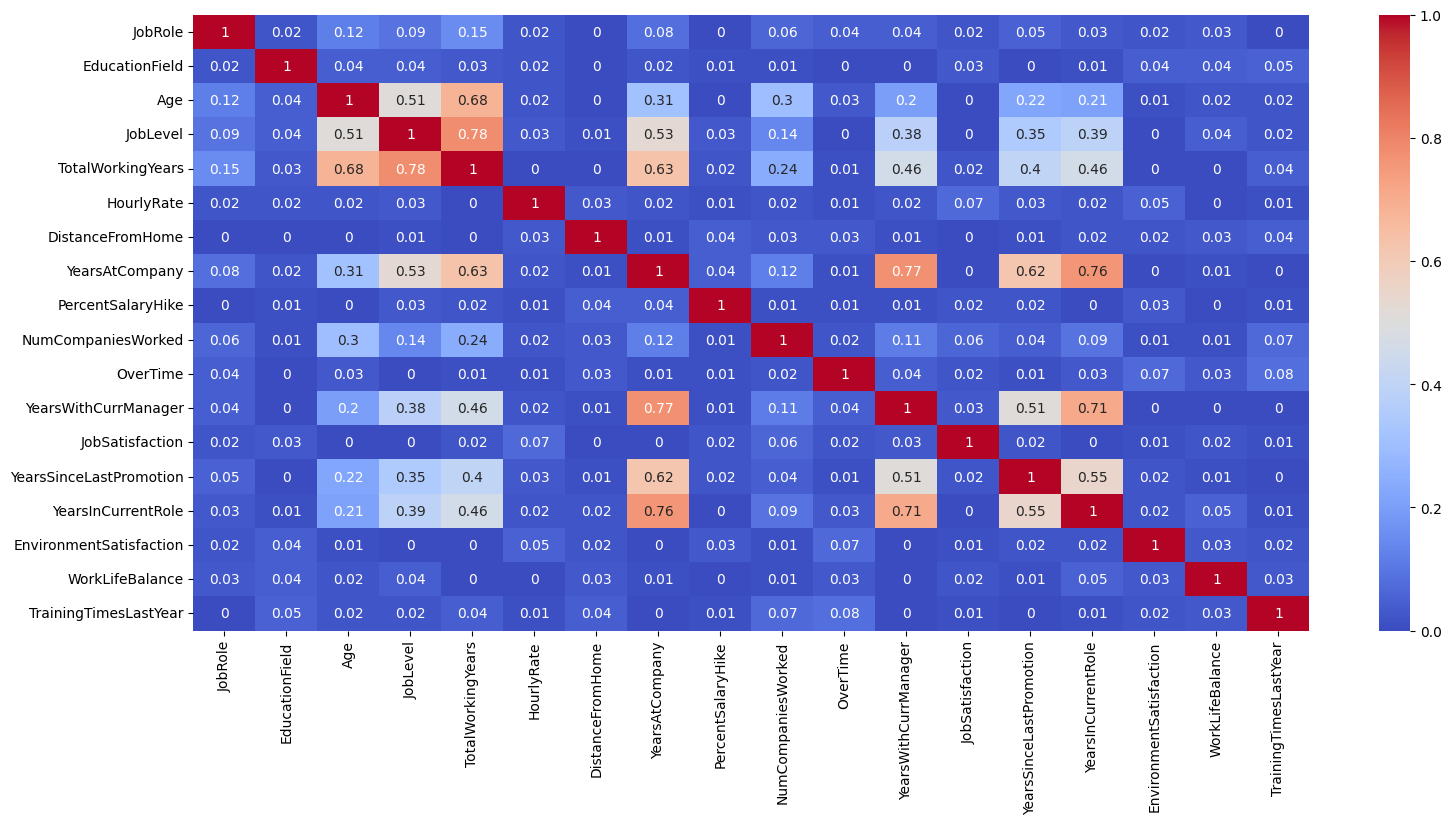

<Figure size 640x480 with 0 Axes>

'ord encode, highly correlated data: []'

In [ ]:
# Calculate correlation matrix Ord data:

X_ord_corr_matrix = X_ord_df.corr().abs().round(2)

# Set the figure size
plt.figure(figsize=(18, 8))  # Adjust the width and height as needed

# Plot heatmaps
sns.heatmap(X_ord_corr_matrix, annot=True, cmap='coolwarm')
f = plt.figure()
plt.show()

# Select upper triangle of correlation matrix
upper = X_ord_corr_matrix.where(np.triu(np.ones(X_ord_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'ord encode, highly correlated data: {high_corr}')

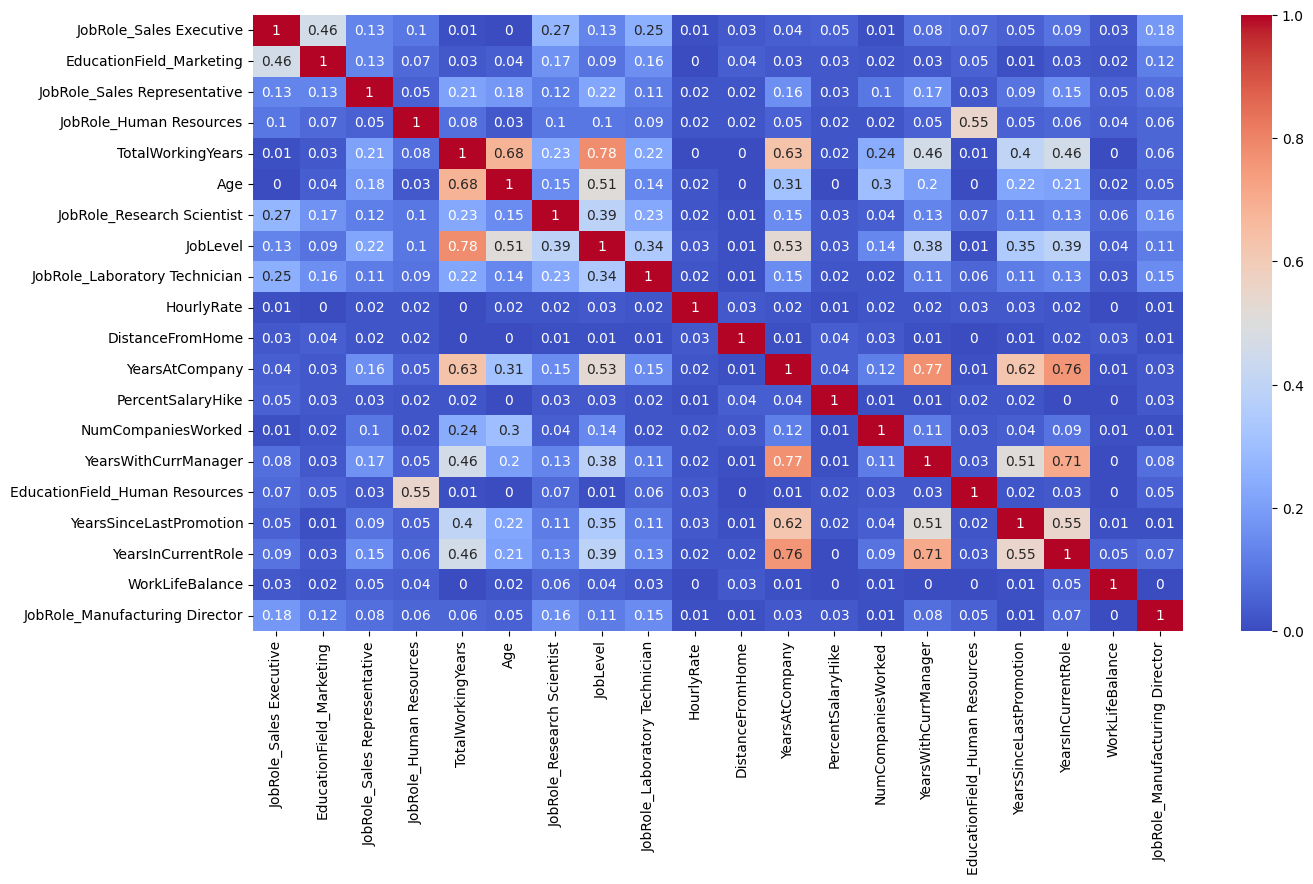

<Figure size 640x480 with 0 Axes>

'ohe, highly correlated data: []'

In [ ]:
# Calculate correlation matrix for One-Hot Encoded data:

X_ohe_corr_matrix = X_ohe_df.corr().abs().round(2)

# Set the figure size
plt.figure(figsize=(15, 8))  # Adjust the width and height as needed

# Plot OHE heatmaps
sns.heatmap(X_ohe_corr_matrix, annot=True, cmap='coolwarm')
f2 = plt.figure()
plt.show()

# Select upper triangle of correlation matrix
upper = X_ohe_corr_matrix.where(np.triu(np.ones(X_ohe_corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]
display(f'ohe, highly correlated data: {high_corr}')

### No significant correlation found among X data.  Moving on using the two lists of X data, both reduced by observing Important Feature data:

###       1) X_ord_df data: X string data encoded using Ordinal Classification
###       2) X_ohe_df data: X string data encoded using One Hot Encoding

In [ ]:
# Created list of 10+ X column names for use as X data"
#       1) X_ord_df data: X string data encoded using Ordinal Classifcation
#       2) X_ohe_df data: X string data encoded using One Hot Encoding
#
# Created X_dfs using the selected columns

'X ordinal encoded data: '

,JobRole,EducationField,Age,JobLevel,TotalWorkingYears,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,OverTime,YearsWithCurrManager,JobSatisfaction,YearsSinceLastPromotion,YearsInCurrentRole,EnvironmentSatisfaction,WorkLifeBalance,TrainingTimesLastYear
0,7,1,0.446350,-0.057788,-0.421642,1.383138,-1.010909,-0.164613,-1.150554,2.125136,1,0.245834,1.153254,-0.679146,-0.063296,-0.660531,-2.493820,-2.171982
1,6,1,1.322365,-0.057788,-0.164511,-0.240677,-0.147150,0.488508,2.129306,-0.678049,0,0.806541,-0.660853,-0.368715,0.764998,0.254625,0.338096,0.155707
2,2,4,0.008343,-0.961486,-0.550208,1.284725,-0.887515,-1.144294,-0.057267,1.324226,1,-1.155935,0.246200,-0.679146,-1.167687,1.169781,0.338096,0.155707
3,6,1,-0.429664,-0.961486,-0.421642,-0.486709,-0.764121,0.161947,-1.150554,-0.678049,1,-1.155935,0.246200,0.252146,0.764998,1.169781,0.338096,0.155707
4,2,3,-1.086676,-0.961486,-0.678774,-1.274014,-0.887515,-0.817734,-0.877232,2.525591,0,-0.595227,-0.660853,-0.058285,-0.615492,-1.575686,0.338096,0.155707


Index(['JobRole', 'EducationField', 'Age', 'JobLevel', 'TotalWorkingYears',
       'HourlyRate', 'DistanceFromHome', 'YearsAtCompany', 'PercentSalaryHike',
       'NumCompaniesWorked', 'OverTime', 'YearsWithCurrManager',
       'JobSatisfaction', 'YearsSinceLastPromotion', 'YearsInCurrentRole',
       'EnvironmentSatisfaction', 'WorkLifeBalance', 'TrainingTimesLastYear'],
      dtype='object')

'X one hot encoded string data: '

,JobRole_Sales Executive,EducationField_Marketing,JobRole_Sales Representative,JobRole_Human Resources,TotalWorkingYears,Age,JobRole_Research Scientist,JobLevel,JobRole_Laboratory Technician,HourlyRate,DistanceFromHome,YearsAtCompany,PercentSalaryHike,NumCompaniesWorked,YearsWithCurrManager,EducationField_Human Resources,YearsSinceLastPromotion,YearsInCurrentRole,WorkLifeBalance,JobRole_Manufacturing Director
0,1.0,0.0,0.0,0.0,-0.421642,0.446350,0.0,-0.057788,0.0,1.383138,-1.010909,-0.164613,-1.150554,2.125136,0.245834,0.0,-0.679146,-0.063296,-2.493820,0.0
1,0.0,0.0,0.0,0.0,-0.164511,1.322365,1.0,-0.057788,0.0,-0.240677,-0.147150,0.488508,2.129306,-0.678049,0.806541,0.0,-0.368715,0.764998,0.338096,0.0
2,0.0,0.0,0.0,0.0,-0.550208,0.008343,0.0,-0.961486,1.0,1.284725,-0.887515,-1.144294,-0.057267,1.324226,-1.155935,0.0,-0.679146,-1.167687,0.338096,0.0
3,0.0,0.0,0.0,0.0,-0.421642,-0.429664,1.0,-0.961486,0.0,-0.486709,-0.764121,0.161947,-1.150554,-0.678049,-1.155935,0.0,0.252146,0.764998,0.338096,0.0
4,0.0,0.0,0.0,0.0,-0.678774,-1.086676,0.0,-0.961486,1.0,-1.274014,-0.887515,-0.817734,-0.877232,2.525591,-0.595227,0.0,-0.058285,-0.615492,0.338096,0.0


Index(['JobRole_Sales Executive', 'EducationField_Marketing',
       'JobRole_Sales Representative', 'JobRole_Human Resources',
       'TotalWorkingYears', 'Age', 'JobRole_Research Scientist', 'JobLevel',
       'JobRole_Laboratory Technician', 'HourlyRate', 'DistanceFromHome',
       'YearsAtCompany', 'PercentSalaryHike', 'NumCompaniesWorked',
       'YearsWithCurrManager', 'EducationField_Human Resources',
       'YearsSinceLastPromotion', 'YearsInCurrentRole', 'WorkLifeBalance',
       'JobRole_Manufacturing Director'],
      dtype='object')

'y encoded data: '

,Attrition,Department
0,1,1
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_ord_train, X_ord_test, y_ord_train, y_ord_test = train_test_split(X_ord_df, y_df_encoded, random_state=78)
X_ohe_train, X_ohe_test, y_ohe_train, y_ohe_test = train_test_split(X_ohe_df, y_df_encoded, random_state=78)

In [ ]:
# Convert your X data to numeric data types however you see fit: encoded previously, using Ordinal and One-Hot Encoding

# Show the data types for X_df
display("X ordinal encoded data: ")
display(X_ord_df.head())
display(X_ord_df.columns)
display("X one hot encoded string data: ")
display(X_ohe_df.head())
display(X_ohe_df.columns)
display("y encoded data: ")
display(y_df_encoded.head())


No     788
Yes    314
Name: OverTime, dtype: int64

In [ ]:

# Create a StandardScaler
# Fit the StandardScaler to the training data
# Scale the training and testing data

In [ ]:
# Create a OneHotEncoder for the Department column


# Fit the encoder to the training data


# Create two new variables by applying the encoder
# to the training and testing data




array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
# Create a OneHotEncoder for the Attrition column


# Fit the encoder to the training data


# Create two new variables by applying the encoder
# to the training and testing data



array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Create, Compile, and Train the Model

In [ ]:
# Find the number of columns in the X training data


# Create the input layer


# Create at least two shared layers


In [ ]:
# Create a branch for Department
# with a hidden layer and an output layer

# Create the hidden layer


# Create the output layer



In [ ]:
# Create a branch for Attrition
# with a hidden layer and an output layer

# Create the hidden layer


# Create the output layer



In [ ]:
# Create the model


# Compile the model


# Summarize the model


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 10)]                 0         []                            
                                                                                                  
 shared1 (Dense)             (None, 64)                   704       ['input[0][0]']               
                                                                                                  
 shared2 (Dense)             (None, 128)                  8320      ['shared1[0][0]']             
                                                                                                  
 department_hidden (Dense)   (None, 32)                   4128      ['shared2[0][0]']             
                                                                                              

In [ ]:
# Train the model



Epoch 1/100
35/35 [==============================] - 14s 25ms/step - loss: 1.4162 - department_output_loss: 0.8374 - attrition_output_loss: 0.5787 - department_output_accuracy: 0.6316 - attrition_output_accuracy: 0.7024
Epoch 2/100
35/35 [==============================] - 1s 27ms/step - loss: 1.2070 - department_output_loss: 0.7661 - attrition_output_loss: 0.4408 - department_output_accuracy: 0.6570 - attrition_output_accuracy: 0.8403
Epoch 3/100
35/35 [==============================] - 0s 13ms/step - loss: 1.1520 - department_output_loss: 0.7539 - attrition_output_loss: 0.3981 - department_output_accuracy: 0.6570 - attrition_output_accuracy: 0.8403
Epoch 4/100
35/35 [==============================] - 0s 14ms/step - loss: 1.1231 - department_output_loss: 0.7452 - attrition_output_loss: 0.3779 - department_output_accuracy: 0.6588 - attrition_output_accuracy: 0.8475
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 1.1031 - department_output_loss: 0.7342 - attriti

In [ ]:
# Evaluate the model with the testing data


12/12 [==============================] - 0s 3ms/step - loss: 4.1624 - department_output_loss: 3.1143 - attrition_output_loss: 1.0481 - department_output_accuracy: 0.5272 - attrition_output_accuracy: 0.8261


[4.162380218505859,
 3.114327907562256,
 1.0480519533157349,
 0.5271739363670349,
 0.8260869383811951]

In [ ]:
# Print the accuracy for both department and attrition


Department predictions accuracy: 0.5271739363670349
Attrition predictions accuracy: 0.8260869383811951


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

YOUR ANSWERS HERE

1.
2.
3.